# Homework #2



> Nathan Stenseng



## Hydrostatic Pressure Distribution

The tank shown below contains 3 fluids with densities $\rho_1 = 1200$ kg m$^{-3}$ (bottom), $\rho_2 = 850$ kg m$^{-3}$ (middle), and $\rho_3 = 500$ kg m$^{-3}$ (top). The interfaces between the fluids are at heights $z_1 =1.2$ m,$z_2 =2.5$ m,and$z_3 =3$ m, where $z=0$ corresponds to the bottom of the tank. The atmospheric pressure is $p_{atm} = 105$ Pa and the acceleration of gravity is $g = 9.81$ m s$^{−2}$. Plot the absolute pressure distribution in the tank as a function of the vertical coordinate z. You can plot this using a plotting program or ”by hand”, but your plot should be readable and accurate.

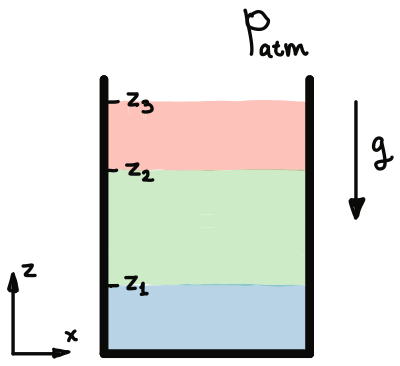

In [1]:
pip install pint

     |████████████████████████████████| 204 kB 2.7 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

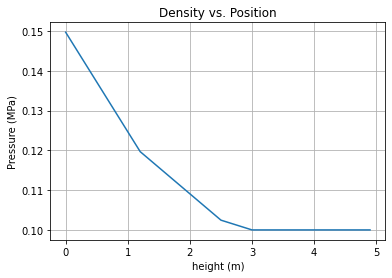

In [9]:
end = 5
z = np.arange(0,end,0.1)*ureg.meters

g = Q_(9.81, "m/s^2")
rho_1 = Q_(1200, "kg/m^3")
rho_2 = Q_(850, "kg/m^3")
rho_3 = Q_(500, "kg/m^3")
z_1 = Q_(1.2, "m")
z_2 = Q_(2.5, "m")
z_3 = Q_(3, "m")

def H(a):
  if a > 0:
    return 1
  else:
    return 0

def rho(z):
  return 10**5*ureg.Pa + rho_1*g*(z_1-z)*H(z_1-z) + rho_2*g*(z_2-z)*H(z_2-z) + rho_3*g*(z_3-z)*H(z_3-z)

rho_list = np.zeros_like(z)*ureg.MPa
for i in range(len(z)):
  rho_list[i] = rho(z[i]) 

plt.plot(z,rho_list)
plt.xlabel("height (m)")
plt.ylabel("Pressure (MPa)")
plt.title("Density vs. Position")
plt.grid(True)
plt.show()

## The Hunt for Red October

(no spoilers here, this is not an accurate sequence of events) In the movie The Hunt for Red October after gunfire erupts on Red October’s bridge two small circular holes are created in the submarine. Both holes have diameter $D = 0.01$ m. Hole A is on a horizontal surface ($x–y$ plane) on the top of the hull and Hole B is on a vertical plane ($x–z$ plane) on the root of the sail. Both holes are at depth of $h = 120$ m. Captain Ramius suggests that two sailors plug the holes using their fingers.

• Is this a reasonable suggestion? What is the force required to keep the water from entering the submarine in each hole?

• Is the force required to stop the water from entering through the two holes the same or different? Please explain why (your explanation should be short, accurate, and complete).

Use $g = 9.81$ m s$^{−2}$ for the acceleration of gravity, $\rho = 1000$ kg m$^{−3}$ for the density of water. The air in the submarine is somewhat over-pressurized with respect to the atmospheric surface pressure. The pressure in the submarine in $100$ Pa more than the atmospheric surface pressure.


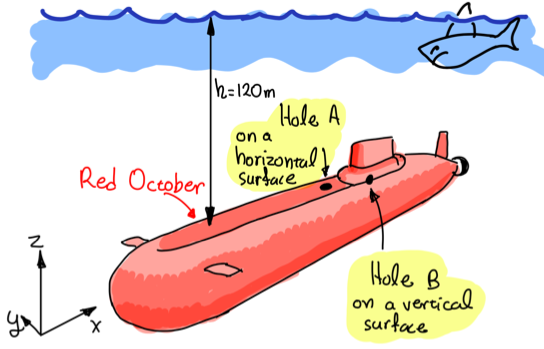

The pressure exhuted at that depth would be:

$$p=\rho g h$$

Since we have the area of the whole, we can determine the force of the pressure:

$$F=pA$$

In [ ]:
rho = Q_(1000, "kg*m^-3")
h = Q_(120, "m")
D = Q_(0.01, "m")
A = (np.pi*D**2)/4

p = rho*g*h - Q_(100, "Pa")
print("Pressure =", p.to("psi").round(2))
F = p*A

print("Force =",F.to("lbf").round(2))

Pressure = 170.72 pound_force_per_square_inch
Force = 20.78 force_pound


I would say that using your finger would be impossible to hold back the pressure. However, the force is only 20 pounds so if you had a plate pressed against the wall, it would be possible to hold back the weight. But not soley using your fingure.

The pressure on the two holes would be the same. They are at the same height below the water and that is the only variable used in the equation for pressure.

## Straw

Before beginning this problem, please take a moment to think about the fluid dynamics of using a straw to enjoy our drinks. In this problem we will answer the question: is there a maximum straw length that we can use? A more accurate question is what is the maximum height $h_{max}$ from which we can enjoy our drink from, like in the figure below. This problems might appear at first that has to do with the motion of the fluid in the straw but it is a problem of fluid statics. For the specific case of the snail enjoying a Frappuccino with density $\rho_{frapp} = 990$ kg m$^{−3}$, in NYC with atmospheric surface pressure $p_{atm} = 10^5$ Pa, and acceleration of gravity $g = 9.81$ m s$^{−2}$, what is $h_{max}$?

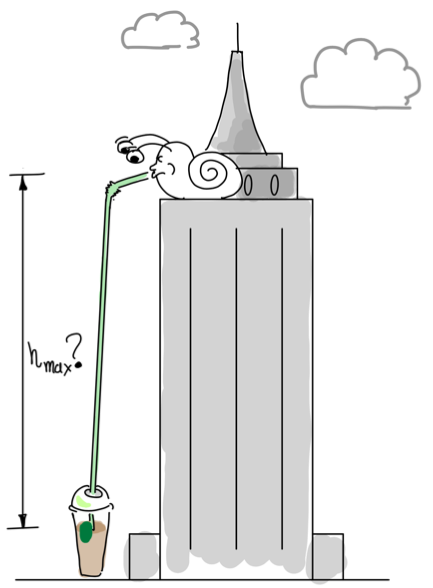

Summing the forces due to pressure give:

$$p_{atm}A_{straw}=\rho_{frapp}gh_{max}A_{straw}$$

In [ ]:
p_atm = Q_(10**5, "Pa")
rho_frapp = Q_(990, "kg/m^3")

h_max = p_atm/(rho_frapp*g)

print("h_max =", h_max.to("m").round(2))

h_max = 10.3 meter


## Buoyancy

A cube with sides of length $l$ floats in a liquid with density $\rho_l = 1000$ kg m$^{−3}$. The cube is submerged by $\frac{4}{5}l$ as shown in the figure below. What is the density of the cube material $\rho_c$?

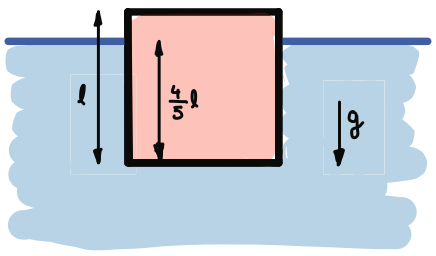

The sum of forces in this static equalibrium is:

$$F_g=F_b$$

where:

$$F_g = \rho_{object} gV_{object}$$

$$F_b=\rho_{H_2O}gV_{submerged}$$

Now the first equation is:

$$\rho_c gl^3=\rho_l g \left(\frac{4}{5}l\right)(l)^2$$

In [ ]:
rho_l = Q_(1000, "kg/m^3")
rho_c = rho_l*(4/5)
print("The cube has a density of:",rho_c.round(2))

The cube has a density of: 800.0 kilogram / meter ** 3
